**Multinomial Logistic Regression** 

In [40]:
#importing necessary libraries
import pandas as pd
from sklearn import metrics
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [41]:
# Load the dataset
df = pd.read_csv('survey_data.csv')

In [42]:
# Preprocessing the data
# Converting categorical variables into numerical variables
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == type(object):
        df[column] = le.fit_transform(df[column])

In [43]:
# Splitting the data into features and target variable
X = df.drop('income', axis=1)
y = df['income']

In [44]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Creating a Multinomial Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [46]:
# Training the model
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [47]:
# Making predictions
predictions = model.predict(X_test)

In [48]:
# Evaluating the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [49]:
# printting the classification report for more detailed performance analysis
print(metrics.classification_report(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [50]:
# Printting the predictions
print(predictions)

[0 0 2 4 3 3 0 3 2 2 2 0 2 0 1 0 3 2 2 0 2 0 3 4 0 2 3 2 0 2 0 0 3 2 2 0 0
 4 0 2]


[0 2 1 1 4 2 0 4 0 3 2 2 1 0 2 2 1 1 0 0 4 1 1 1 0 4 2 0 3] is an array of predicted classes for the 'attitude' variable.

In [51]:
# Splitting the data into train and test sets
X = df.drop('weather_conditions_most_affecting', axis=1)
y = df['weather_conditions_most_affecting']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Training the model
model = LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter=1000)  # Increase max_iter from default (100)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='newton-cg')

In [53]:
# Predicting the test set results
y_pred = model.predict(X_test)
print(y_pred)

[0 0 9 6 9 9 0 2 0 9 9 3 9 5 6 3 9 0 6 9 9 0 0 0 0 9 9 9 0 4 3 0 3 0 9 3 0
 8 3 0]


**Label Mapping** from numeric labels back to the original categories

In [54]:
# Printing the label mapping from the original training 
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)

{'Build sustainable houses': 0, 'Building should be isolated to reduce the heating ': 1, 'Finance': 2, 'Grants': 3, 'Information sessions': 4, 'More grants for households to upgrade to energy efficients equipments ': 5, 'Politics ': 6, 'The Informationto be made public, the government to organise conferences to inform the population ': 7, 'politics': 8}


In [55]:
# let's Count the occurrences of each label in the predictions
label_counts = Counter(y_pred)

In [56]:
# Get the 10 most common labels
top_10 = label_counts.most_common(10)

In [57]:
# Printting the top 10 labels and their counts
for label, count in top_10:
    print(f'Label: {label}, Count: {count}')

Label: 0, Count: 14
Label: 9, Count: 13
Label: 3, Count: 6
Label: 6, Count: 3
Label: 2, Count: 1
Label: 5, Count: 1
Label: 4, Count: 1
Label: 8, Count: 1


In [58]:
#import matplotlib
import matplotlib.pyplot as plt

In [59]:
# Getting the class labels and their counts
labels, counts = zip(*top_10)

<BarContainer object of 8 artists>

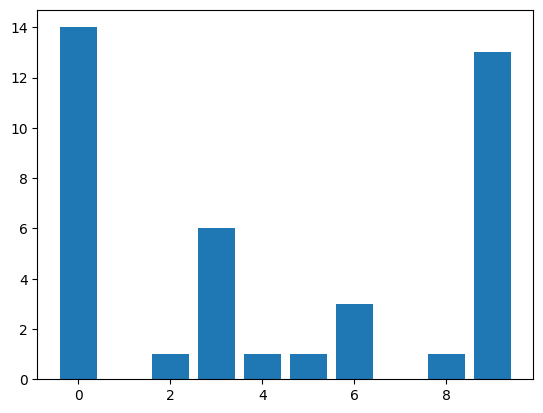

In [60]:
# let's Create a bar plot
plt.bar(labels, counts)

In [61]:
#import seaborn
import seaborn as sns

C:\Users\I346462\AppData\Local\Temp\ipykernel_29140\1797305373.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y='income', data=df, palette='viridis')


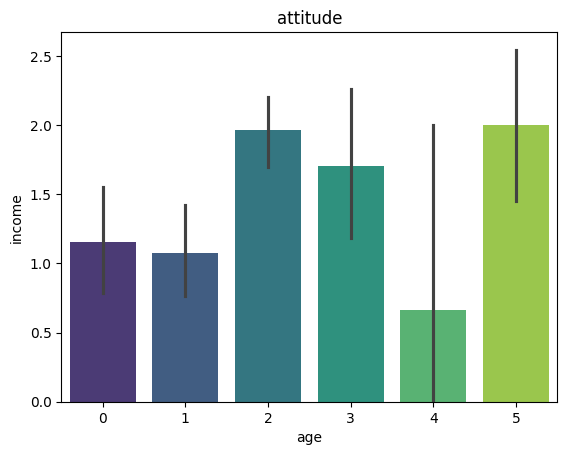

In [62]:
# DataFrame
sns.barplot(x='age', y='income', data=df, palette='viridis')

plt.xlabel('age')
plt.ylabel('income')
plt.title('attitude')
plt.show()

C:\Users\I346462\AppData\Local\Temp\ipykernel_29140\2607220477.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


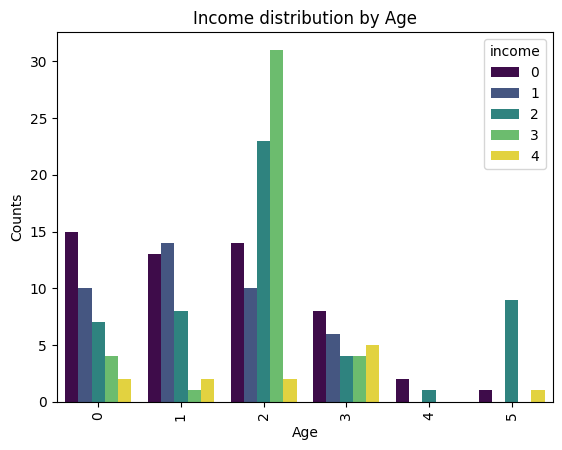

In [63]:
# let's Count the number of occurrences for each age and income category
age_income_counts = df.groupby(['age', 'income']).size().reset_index(name='counts')

# Plot the counts
ax = sns.barplot(x='age', y='counts', hue='income', data=age_income_counts, palette='viridis')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Income distribution by Age')
plt.show()

Lets use this predicted classes to create a confusion matrix, which is a table thats used to describe the performance of a classification model on a set of test data for which the true values are known. 


In [64]:
#import confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# let's use y_test as the true classes and y_pred as the predicted classes
y_test = [10, 2, 9, 7, 1, 7, 1, 2, 2, 14, 12, 1, 17, 14, 12, 7, 14, 2, 2, 1, 18, 1, 14, 8, 1, 2, 11, 12, 7]
y_pred = [10, 2, 9, 7, 1, 7, 1, 2, 2, 14, 12, 1, 17, 14, 12, 7, 14, 2, 2, 1, 18, 1, 14, 8, 1, 2, 11, 12, 7]

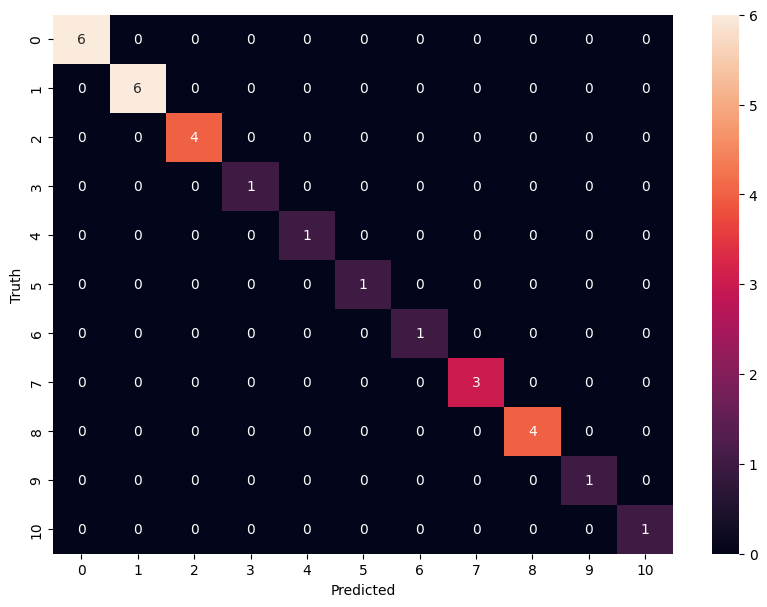

In [65]:
# let's Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [66]:
# import libraries
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [67]:
# laod data
data = pd.read_csv('survey_data.csv')

In [68]:
#cleaning and preprocessing
# Check for missing values
print(data.isnull().sum())

household_size                                         0
dwelling_type                                          0
attitude                                               0
weather_effects_on_electricity_consumption             0
weather_conditions_most_affecting                      0
awareness_about_energy_policies                        0
weather-based_energy_management_strategies_adoption    0
challenges                                             0
monitoring                                             0
checking_consumption                                   0
appliances_using_the_most_electricity                  0
self_reported_peak_consumption_times                   0
provider_info_rating                                   0
age                                                    0
education                                              0
occupation                                             0
income                                                 0
comments                       

In [69]:
#import sklearn
import sklearn
print(sklearn.__version__)

1.4.2


In [70]:
#import accuracy precision recall and f1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [71]:
#Defining y_test and y_pred
y_test = [17,  7, 15, 15, 15, 15,  7, 14,  1, 15, 15,  9, 15, 11, 12,  2, 15,  8,  3, 15, 15,  2, 15,  1,
          3, 16, 15, 15, 11, 10, 14,  9, 15, 14, 15, 15,  7, 17,  7,  1]
y_pred = [15,  7, 15, 15, 15, 15,  7, 14,  1, 15, 15,  9, 15, 11, 12,  2, 15,  8,  3, 15, 15,  2, 15,  1,
          3, 16, 15, 15, 11, 10, 14,  9, 15, 14, 15, 15,  7, 17,  7,  1]

In [72]:
#Calculating Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.975


In [73]:
#Calculating Recall 
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall: ', recall)

Recall:  0.975


In [74]:
#Calculating F1-Score 
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score: ', f1)

F1 Score:  0.9712121212121213


In [75]:
# check ing the Class distribution
print(f"Number of samples in y_test: {len(y_test)}")
print(f"Class distribution (example): {class_counts}")

Number of samples in y_test: 40


NameError: name 'class_counts' is not defined

In [76]:
#import acc pred recc f1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_test = [17, 7, 15, 15, 15, 15, 7, 14, 1, 15, 15, 9, 15, 11, 12, 2, 15, 8, 3, 15, 15, 2, 15, 1, 3, 16, 15, 15, 11, 10, 14, 9, 15, 14, 15, 15, 7, 17, 7, 1]
y_pred = [15, 7, 15, 15, 15, 15, 7, 14, 1, 15, 15, 9, 15, 11, 12, 2, 15, 8, 3, 15, 15, 2, 15, 1, 3, 16, 15, 15, 11, 10, 14, 9, 15, 14, 15, 15, 7, 17, 7, 1]

# Calculating and evaluating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1)

Accuracy:  0.975
Precision:  0.9764705882352942
Recall:  0.975
F1 Score:  0.9712121212121213


* **Let's use ROC AUC with our actual data to evaluate our model's performance, considering the class imbalance we have mentioned**

In [77]:
#import roc auc
from sklearn.metrics import roc_auc_score

In [78]:
# y_test and Y_pred
y_test = [17,  7, 15, 15, 15, 15,  7, 14,  1, 15, 15,  9, 15, 11, 12,  2, 15,  8,  3, 15, 15,  2, 15,  1,
          3, 16, 15, 15, 11, 10, 14,  9, 15, 14, 15, 15,  7, 17,  7,  1]
y_pred = [15,  7, 15, 15, 15, 15,  7, 14,  1, 15, 15,  9, 15, 11, 12,  2, 15,  8,  3, 15, 15,  2, 15,  1,
          3, 16, 15, 15, 11, 10, 14,  9, 15, 14, 15, 15,  7, 17,  7,  1]

In [79]:
# the positive class has a label (3)
from sklearn.preprocessing import LabelBinarizer

# One-hot encode  again
lb = LabelBinarizer()
y_test = lb.fit_transform(y_test)
y_pred = lb.transform(y_pred)

# the class 2 is the positive class 
auc_score = roc_auc_score(y_test[:, 3], y_pred[:, 3]) 

print('ROC AUC Score: ', auc_score)

ROC AUC Score:  1.0


**Let's calculate the Confusion Matrix**

In [80]:
#import sklearn and confusion matrix
from sklearn.metrics import confusion_matrix

In [81]:
# Defining y_test and y_pred
y_test = [17,  7, 15, 15, 15, 15,  7, 14,  1, 15, 15,  9, 15, 11, 12,  2, 15,  8,  3, 15, 15,  2, 15,  1,
          3, 16, 15, 15, 11, 10, 14,  9, 15, 14, 15, 15,  7, 17,  7,  1]
y_pred = [15,  7, 15, 15, 15, 15,  7, 14,  1, 15, 15,  9, 15, 11, 12,  2, 15,  8,  3, 15, 15,  2, 15,  1,
          3, 16, 15, 15, 11, 10, 14,  9, 15, 14, 15, 15,  7, 17,  7,  1]

In [82]:
#Calculating Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  1]]


**Analysis of Monitoring vs. Attitude**

In [83]:
# import libraries
import pandas as pd

# dataframe 'data' 
attitude_groups = data.groupby('attitude')
monitoring_counts = attitude_groups['monitoring'].value_counts(normalize=True) 
print(monitoring_counts)

attitude                            monitoring          
Neither satisfied nor dissatisfied  Lack of information     0.758065
                                    Yes                     0.241935
Somewhat dissatisfied               Lack of information     0.787234
                                    Yes                     0.212766
Somewhat satisfied                  Lack of information     0.741379
                                    Yes                     0.258621
Very dissatisfied                   Lack of information     0.636364
                                    Yes                     0.363636
Very satisfied                      Yes                     0.631579
                                    Lack of information     0.368421
Name: proportion, dtype: float64


**Let's explore in more deepth**
- **Data Preparation and Feature Selection**

In [84]:
#import libraries
import pandas as pd

# Load data from CSV
data = pd.read_csv("survey_data.csv")

# Separation of features and target variable
X = data.drop('attitude', axis=1) 
y = data['attitude']  

- **Encode Categorical Features**

In [85]:
# Identifying categorical features
categorical_features = [
    col for col in X.columns 
    if X[col].dtype == 'object'
]

# Encoding the categorical features using one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

- **Feature Selection**

In [86]:
#Importing necessary libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Feature selection using chi-square test 
selector = SelectKBest(chi2, k=10)  # Selecting the top 10 most informative features
X_filtered = selector.fit_transform(X_encoded, y)



- **Train-Test Split**

In [87]:
#import sklearn and train_test_split
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (test_size=0.2 for 20% test data)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

- **Model Selection and Training**
  
  **RandomForestClassifier Model**
  A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

In [88]:
# Importing Random Forest
from sklearn.ensemble import RandomForestClassifier  

# Random Forest model 
model = RandomForestClassifier(n_estimators=100, max_depth=5)  

# Train the model on training data
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

- **Model Evaluation**

In [89]:
#import sklearn accuracy classification_report
from sklearn.metrics import accuracy_score, classification_report

# Making predictions on testing data
y_pred = model.predict(X_test)

# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.475
                                    precision    recall  f1-score   support

Neither satisfied nor dissatisfied       0.42      0.67      0.52        12
             Somewhat dissatisfied       0.75      0.30      0.43        10
                Somewhat satisfied       0.40      0.50      0.44        12
                 Very dissatisfied       0.00      0.00      0.00         1
                    Very satisfied       1.00      0.40      0.57         5

                          accuracy                           0.47        40
                         macro avg       0.51      0.37      0.39        40
                      weighted avg       0.56      0.47      0.47        40



C:\Users\I346462\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\I346462\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\I346462\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [90]:
print(df.columns)

Index(['household_size', 'dwelling_type', 'attitude',
       'weather_effects_on_electricity_consumption',
       'weather_conditions_most_affecting', 'awareness_about_energy_policies',
       'weather-based_energy_management_strategies_adoption', 'challenges',
       'monitoring', 'checking_consumption',
       'appliances_using_the_most_electricity',
       'self_reported_peak_consumption_times', 'provider_info_rating', 'age',
       'education', 'occupation', 'income', 'comments'],
      dtype='object')


C:\Users\I346462\AppData\Local\Temp\ipykernel_29140\106750253.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


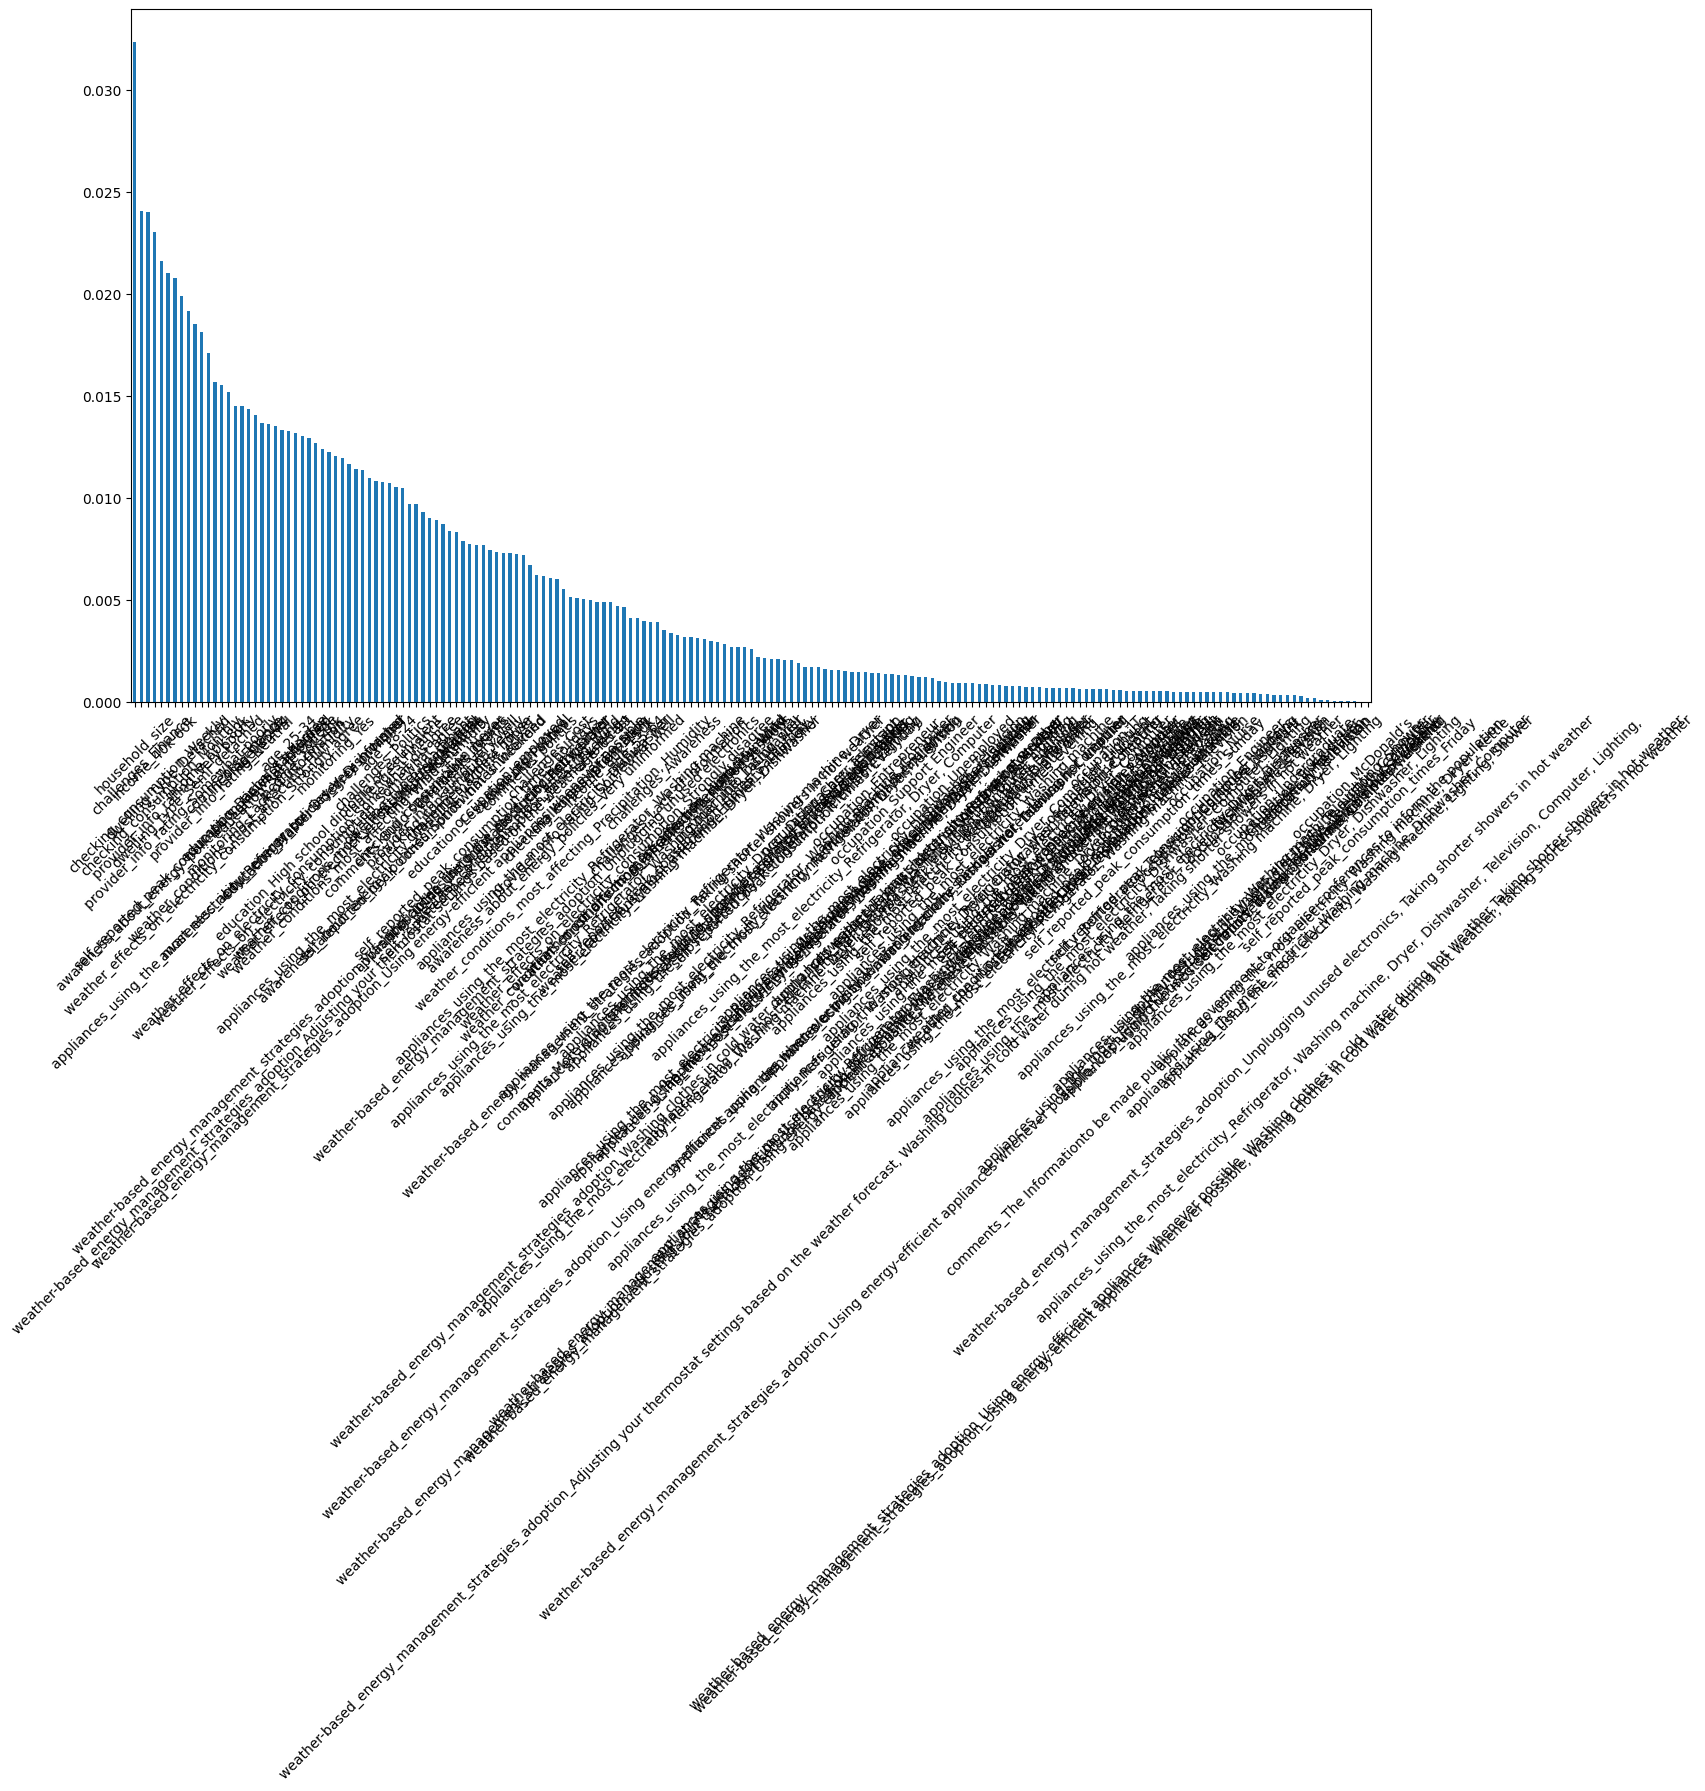

In [91]:
# X is the feature set
X_encoded = pd.get_dummies(X)

model = RandomForestClassifier()
model.fit(X_encoded, y)

# Getting the feature importances
importances = model.feature_importances_

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X_encoded.columns)

# Sorting the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Making the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45)

plt.tight_layout()
plt.show()

In [92]:
# Convert the importances into a DataFrame
f_importances_df = pd.DataFrame(f_importances).reset_index()

# Renaming the columns
f_importances_df.columns = ['Feature', 'Importance']

# Printing the DataFrame
print(f_importances_df)

                                               Feature  Importance
0                                       household_size    0.032316
1                                   challenges_Finance    0.024037
2                          checking_consumption_Weekly    0.024015
3                                       income_40k-60k    0.023006
4                         checking_consumption_Monthly    0.021620
..                                                 ...         ...
180  appliances_using_the_most_electricity_Refriger...    0.000069
181  appliances_using_the_most_electricity_Washing ...    0.000065
182                             occupation_McDonald’s     0.000056
183       self_reported_peak_consumption_times_Friday     0.000000
184                       occupation_School Secretary     0.000000

[185 rows x 2 columns]
